In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from PyFunceble import URLAvailabilityChecker
from htmldom import htmldom
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

SyntaxError: expected ':' (feature_fnc.py, line 23)

In [ ]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

In [ ]:
## Create Dataset ##

In [2]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)

NameError: name 'feature_fnc' is not defined

In [5]:
url_df

,url,status,protocol,hostname,path,params,query,fragment,filename
0,http://www.crestonwood.com/router.php,legitimate,http,www.crestonwood.com,/router.php,,,,router.php
1,http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,http,shadetreetechnology.com,/V4/validation/a111aedc8ae390eabcfa130e041a10a4,,,,a111aedc8ae390eabcfa130e041a10a4
2,https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,https,support-appleld.com.secureupdate.duilawyeryork.com,/ap/89e6a3b4b063b8d/,,cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,,
3,http://rgipt.ac.in,legitimate,http,rgipt.ac.in,,,,,
4,http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,http,www.iracing.com,/tracks/gateway-motorsports-park/,,,,
...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate,http,www.fontspace.com,/category/blackletter,,,,blackletter
11426,http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,http,www.budgetbots.com,/server.php/Server%20update/index.php,,email=USER@DOMAIN.com,,index.php
11427,https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,https,www.facebook.com,/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/,,ref=page_internal,,
11428,http://www.mypublicdomainpictures.com/,legitimate,http,www.mypublicdomainpictures.com,/,,,,


In [4]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)
cleaned_df.set_index('url',inplace=True)

In [5]:
cleaned_df.describe()

,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.0,11430.000000
mean,61.120035,2.480665,0.322660,0.997550,4.289589,0.141207,0.293176,0.022222,0.162292,0.002450,...,0.002975,0.001312,0.0,0.003062,0.000262,0.004024,0.000087,0.0,0.0,0.030359
std,55.292470,1.369685,1.093336,2.087087,1.882251,0.364456,0.998317,0.155500,0.821337,0.059109,...,0.061976,0.036204,0.0,0.095801,0.016199,0.075885,0.009354,0.0,0.0,0.743418
min,12.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,33.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,47.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,71.000000,3.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,1641.000000,24.000000,18.000000,43.000000,33.000000,3.000000,19.000000,4.000000,19.000000,3.000000,...,2.000000,1.000000,0.0,4.000000,1.000000,3.000000,1.000000,0.0,0.0,54.000000


In [6]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [7]:
cleaned_df=cleaned_df.loc[:, ~(cleaned_df == 0).all()]

In [8]:
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})

In [9]:
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [10]:
cleaned_df

,phishing,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_hyphen_count,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,37,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,77,1,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,126,4,2,1,5,1,3,0,2,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,18,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,55,2,0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,45,2,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,84,5,0,0,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,105,2,1,6,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


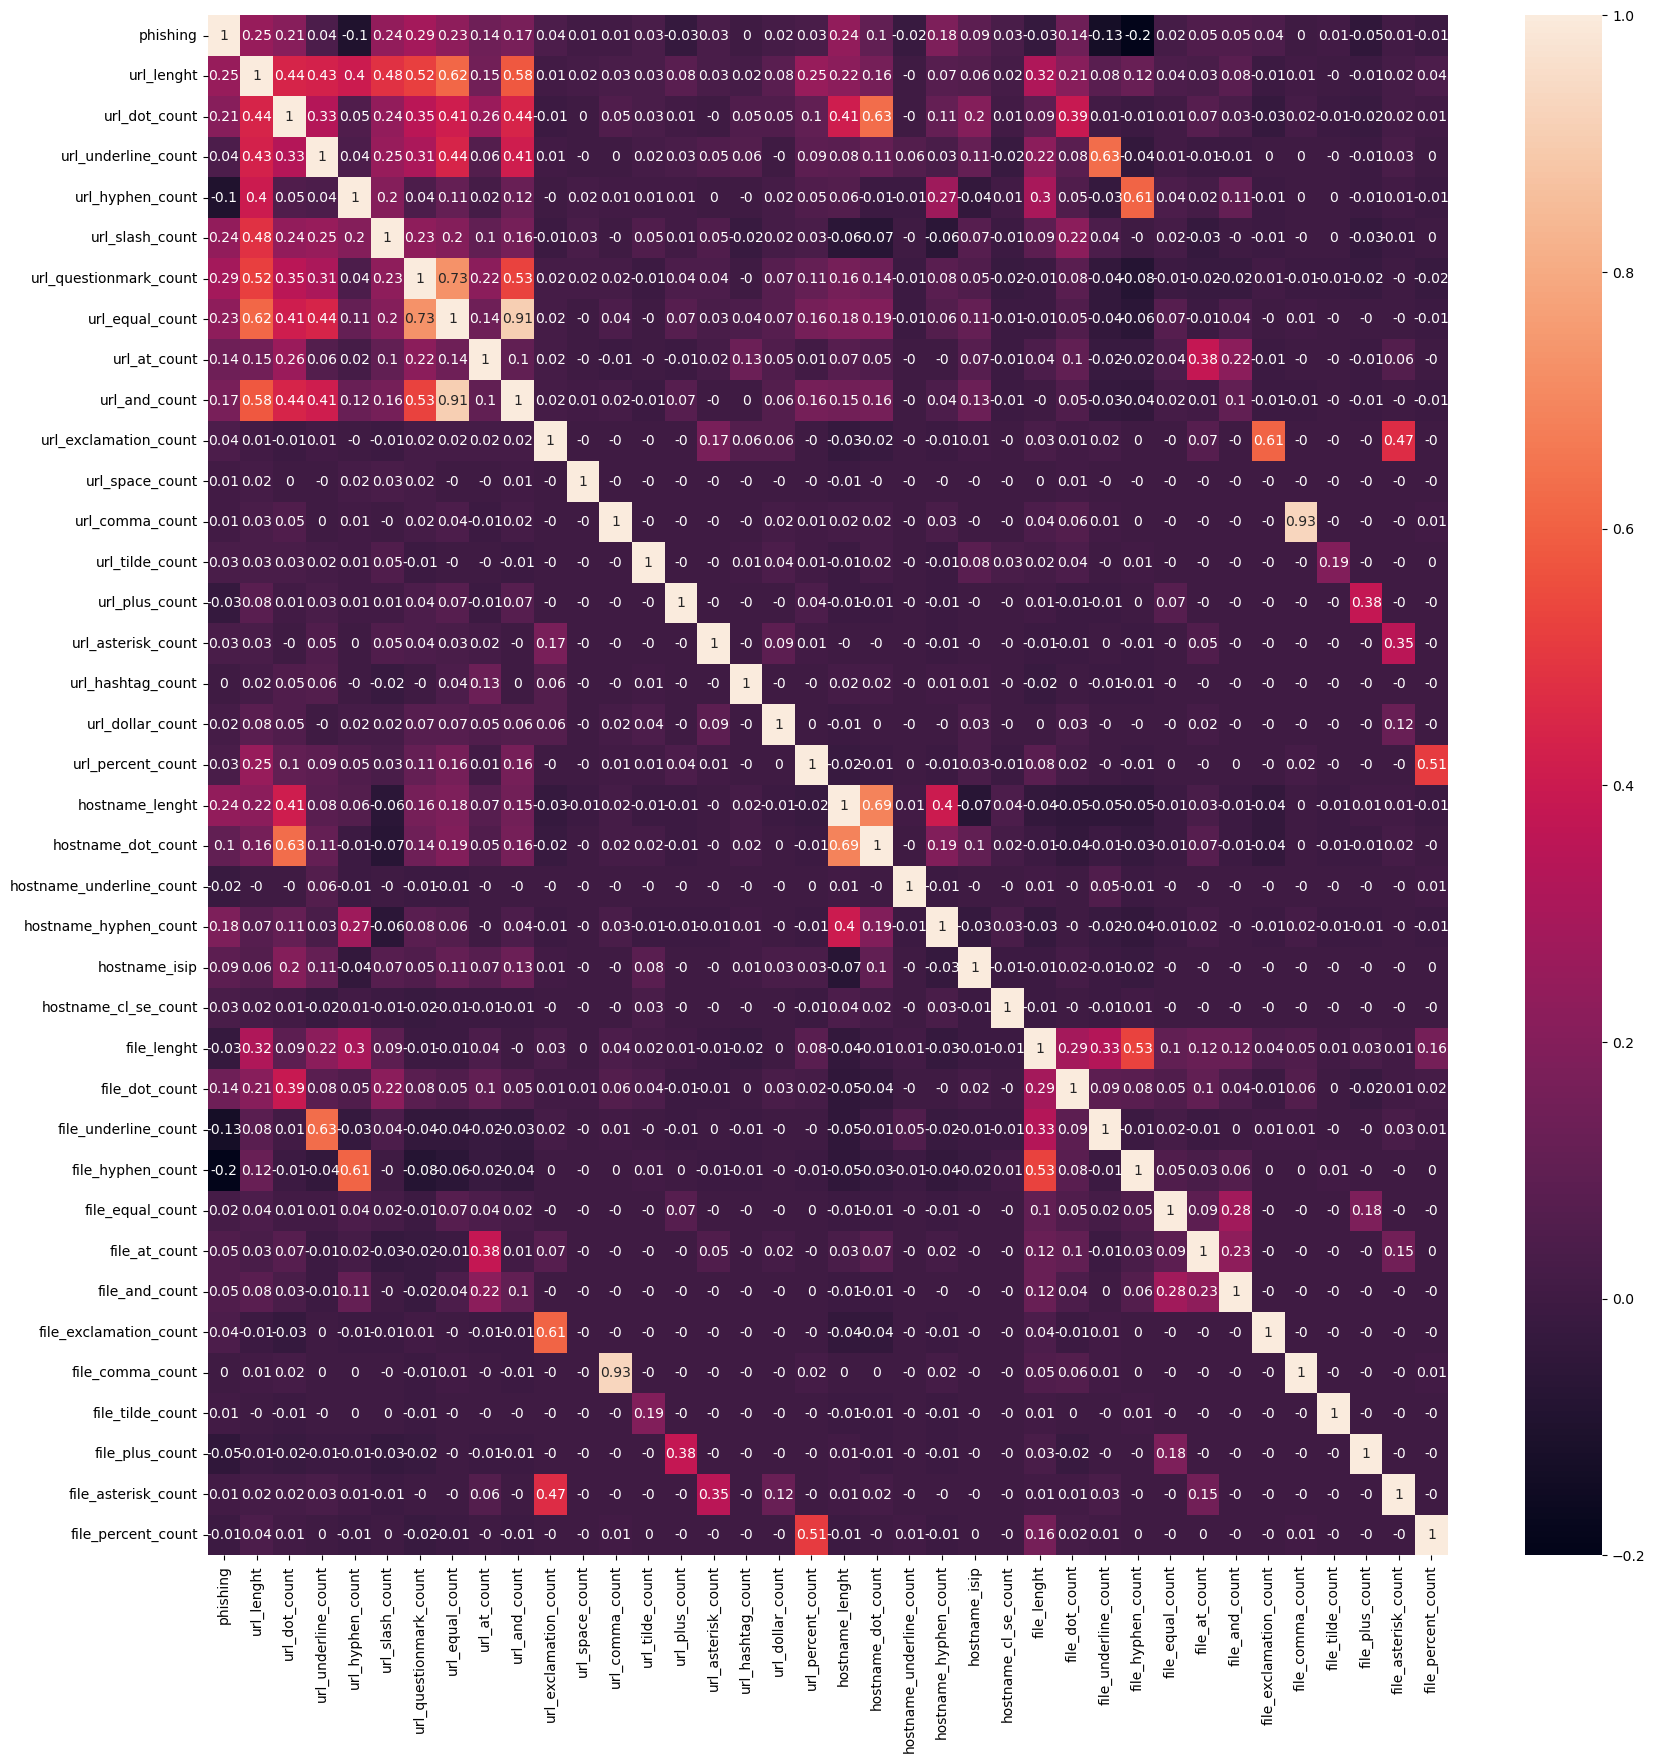

In [11]:
#corr_matrix=test.corr().round(2)
#corr_matrix

plt.figure(figsize=(20,20))
plot = sns.heatmap(cleaned_df.corr().round(2), annot = True)

In [12]:
matrix=cleaned_df.corr().round(2)

In [13]:
matrix

,phishing,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,file_hyphen_count,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
phishing,1.00,0.25,0.21,0.04,-0.10,0.24,0.29,0.23,0.14,0.17,...,-0.20,0.02,0.05,0.05,0.04,0.00,0.01,-0.05,0.01,-0.01
url_lenght,0.25,1.00,0.44,0.43,0.40,0.48,0.52,0.62,0.15,0.58,...,0.12,0.04,0.03,0.08,-0.01,0.01,-0.00,-0.01,0.02,0.04
url_dot_count,0.21,0.44,1.00,0.33,0.05,0.24,0.35,0.41,0.26,0.44,...,-0.01,0.01,0.07,0.03,-0.03,0.02,-0.01,-0.02,0.02,0.01
url_underline_count,0.04,0.43,0.33,1.00,0.04,0.25,0.31,0.44,0.06,0.41,...,-0.04,0.01,-0.01,-0.01,0.00,0.00,-0.00,-0.01,0.03,0.00
url_hyphen_count,-0.10,0.40,0.05,0.04,1.00,0.20,0.04,0.11,0.02,0.12,...,0.61,0.04,0.02,0.11,-0.01,0.00,0.00,-0.01,0.01,-0.01
url_slash_count,0.24,0.48,0.24,0.25,0.20,1.00,0.23,0.20,0.10,0.16,...,-0.00,0.02,-0.03,-0.00,-0.01,-0.00,0.00,-0.03,-0.01,0.00
url_questionmark_count,0.29,0.52,0.35,0.31,0.04,0.23,1.00,0.73,0.22,0.53,...,-0.08,-0.01,-0.02,-0.02,0.01,-0.01,-0.01,-0.02,-0.00,-0.02
url_equal_count,0.23,0.62,0.41,0.44,0.11,0.20,0.73,1.00,0.14,0.91,...,-0.06,0.07,-0.01,0.04,-0.00,0.01,-0.00,-0.00,-0.00,-0.01
url_at_count,0.14,0.15,0.26,0.06,0.02,0.10,0.22,0.14,1.00,0.10,...,-0.02,0.04,0.38,0.22,-0.01,-0.00,-0.00,-0.01,0.06,-0.00
url_and_count,0.17,0.58,0.44,0.41,0.12,0.16,0.53,0.91,0.10,1.00,...,-0.04,0.02,0.01,0.10,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01


In [14]:
mask=matrix.loc['phishing',:]

In [15]:
filt=(mask > 0.04 ) | (mask < -0.04)

In [35]:
filt

phishing                     True
url_lenght                   True
url_dot_count                True
url_underline_count         False
url_hyphen_count             True
url_slash_count              True
url_questionmark_count       True
url_equal_count              True
url_at_count                 True
url_and_count                True
url_exclamation_count       False
url_space_count             False
url_comma_count             False
url_tilde_count             False
url_plus_count              False
url_asterisk_count          False
url_hashtag_count           False
url_dollar_count            False
url_percent_count           False
hostname_lenght              True
hostname_dot_count           True
hostname_underline_count    False
hostname_hyphen_count        True
hostname_isip                True
hostname_cl_se_count        False
file_lenght                 False
file_dot_count               True
file_underline_count         True
file_hyphen_count            True
file_equal_cou

In [16]:
cleaned_df=cleaned_df.loc[:,filt]

In [17]:
cleaned_df

,phishing,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,hostname_lenght,hostname_dot_count,hostname_hyphen_count,hostname_isip,file_dot_count,file_underline_count,file_hyphen_count,file_at_count,file_and_count,file_plus_count
url,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,37,3,0,3,0,0,0,0,19,2,0,0,1,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,77,1,0,5,0,0,0,0,23,1,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,126,4,1,5,1,3,0,2,50,4,1,0,0,0,0,0,0,0
http://rgipt.ac.in,0,18,2,0,2,0,0,0,0,11,2,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,55,2,2,5,0,0,0,0,15,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,45,2,0,4,0,0,0,0,17,2,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,84,5,0,5,1,1,1,0,18,2,0,0,1,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,105,2,6,5,1,1,0,0,16,2,0,0,0,0,0,0,0,0


In [18]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'url_lenght':]
label=cleaned_df.loc[:,'phishing']

In [19]:
features

,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,hostname_lenght,hostname_dot_count,hostname_hyphen_count,hostname_isip,file_dot_count,file_underline_count,file_hyphen_count,file_at_count,file_and_count,file_plus_count
url,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,37,3,0,3,0,0,0,0,19,2,0,0,1,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,77,1,0,5,0,0,0,0,23,1,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,126,4,1,5,1,3,0,2,50,4,1,0,0,0,0,0,0,0
http://rgipt.ac.in,18,2,0,2,0,0,0,0,11,2,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,55,2,2,5,0,0,0,0,15,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,45,2,0,4,0,0,0,0,17,2,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,84,5,0,5,1,1,1,0,18,2,0,0,1,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,105,2,6,5,1,1,0,0,16,2,0,0,0,0,0,0,0,0


In [20]:
label.tail()

url
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                    0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com                                                                                                                                                                                                                                                                                                                                                                                                             1
https://www.facebook.com/Inter

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [24]:
X_train

,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,hostname_lenght,hostname_dot_count,hostname_hyphen_count,hostname_isip,file_dot_count,file_underline_count,file_hyphen_count,file_at_count,file_and_count,file_plus_count
url,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,44,2,0,3,1,0,0,0,14,2,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,88,8,0,6,0,0,0,0,16,2,0,0,1,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,88,3,1,6,0,0,0,0,16,2,0,0,1,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,154,6,4,7,1,3,1,2,30,2,0,0,1,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,49,2,0,5,0,0,0,0,17,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,52,1,1,4,0,0,0,0,24,1,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,41,3,3,3,0,0,0,0,33,3,3,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,36,3,0,3,0,0,0,0,20,2,0,0,1,0,0,0,0,0


In [21]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)
  #return model

In [22]:
hyperpara_opt(features,label)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=1000, gamma=0.001)
Best score for data: 0.8126860769210609
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


In [18]:
hyperpara_opt(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=100, gamma=0.01)
Best score for data: 0.8187739255372315
Best C: 100
Best Kernel: rbf
Best Gamma: 0.01


In [29]:
clf = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)

In [30]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=100, gamma=0.01, verbose=True)

In [31]:
y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8194808982210557


In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8095654709827939


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8110236220472441


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred,normalize=False))

Accuracy: 2781


In [26]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
df_output=pd.DataFrame(y_test) 

In [28]:
df_output['pred']=y_pred

In [29]:
df_output

,phishing,pred
url,,
https://www.rga.com/about/workplace,0,0
http://starasia.com.hk,0,0
https://www.youtube.com/watch?v=XszqITK-UEw,0,0
http://www.civico1845.com/,0,0
http://rapidpaws.com/wp-content/we_transfer/index2.php?email=/,1,1
...,...,...
http://myckck.in/redirect.php?id=j4gww2,1,0
http://www.bcc.ca/buddhism/fournobletruthsandeightfoldpath.html,0,1
https://urb7.com/casasbahia/desktop/pag2.php?path=tv-video/Televisores/TV4K/smart-tv-led-55-uhd-4k-lg-55um7520psb-com-thinq-ai-inteligencia-artificial-ips-quad-core-hdr-ativo-dts-virtual-x-webos-4-5-bluetooth-e-hdmi-50004199.html,1,1


In [29]:
y_test.head(20)

7529     legitimate
11221    legitimate
4889     legitimate
8962     legitimate
4004       phishing
3265     legitimate
11235      phishing
8897     legitimate
900      legitimate
7856     legitimate
3936     legitimate
11049      phishing
5551     legitimate
1393     legitimate
8847     legitimate
11018      phishing
1662       phishing
10297      phishing
6196       phishing
3834       phishing
Name: status, dtype: object

In [28]:
y_pred[:20]

array(['legitimate', 'legitimate', 'legitimate', 'legitimate', 'phishing',
       'legitimate', 'phishing', 'legitimate', 'legitimate', 'legitimate',
       'legitimate', 'phishing', 'phishing', 'legitimate', 'legitimate',
       'legitimate', 'legitimate', 'legitimate', 'phishing', 'legitimate'],
      dtype=object)

In [50]:
list(cleaned_df.columns)

['url',
 'status',
 'url_lenght',
 'url_dot_count',
 'url_underline_count',
 'url_hyphen_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'url_at_count',
 'url_and_count',
 'url_exclamation_count',
 'url_space_count',
 'url_comma_count',
 'url_tilde_count',
 'url_plus_count',
 'url_asterisk_count',
 'url_hashtag_count',
 'url_dollar_count',
 'url_percent_count',
 'hostname_lenght',
 'hostname_dot_count',
 'hostname_underline_count',
 'hostname_hyphen_count',
 'hostname_slash_count',
 'hostname_questionmark_count',
 'hostname_equal_count',
 'hostname_at_count',
 'hostname_and_count',
 'hostname_exclamation_count',
 'hostname_space_count',
 'hostname_comma_count',
 'hostname_tilde_count',
 'hostname_plus_count',
 'hostname_asterisk_count',
 'hostname_hashtag_count',
 'hostname_dollar_count',
 'hostname_percent_count',
 'hostname_isip',
 'hostname_cl_se_count',
 'file_lenght',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count',
 'file_slash_count',

In [53]:
cleaned_df.shape

(11430, 58)